# Module for Sentinel 1 Single Look Complex Data Acquisition

## 0. Pre-Setup

In [5]:
import plotly.io as pio

# A: JupyterLab user
#pio.renderers.default = "jupyterlab"

# B: Classic Jupyter Notebook user
# pio.renderers.default = "notebook"

# C: None of the above don't work, or VSCode
pio.renderers.default = "iframe"

In [6]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

# get current working dir
%pwd

'/raven/u/yhsuh/coding/INSAR/examples'

## 1. `S1SLCManager` Class

### 1) Initialize instance

In [7]:
from modules.SLC_manager import S1SLCManager
import os

# ---------------------------------------------------------
# 1. Example Musan Mining
# ---------------------------------------------------------
# 무산 광산 ROI
ROI = "POLYGON((129.2 42.2, 129.3 42.2, 129.3 42.3, 129.2 42.3, 129.2 42.2))"
WORK_DIR = "raw_data"

# Initialize an instance for the job
dm = S1SLCManager(ROI)

### 2) `search_images` Method

In [8]:
# ---------------------------------------------------------
# 2. Search SLC
# ---------------------------------------------------------
print("=== 1. Searching Images ===")
# Assign search results to a variable and check the DataFrame
# You can search SLCs that match your criteria

#Args:
 # start_date (str): Start date in 'YYYY-MM-DD' format
 # end_date (str): End date in 'YYYY-MM-DD' format
 # orbit_direction (str, optional): Flight direction. 'ASCENDING', 'DESCENDING', or None (default, searches both)

# returns:
 # pandas.DataFrame: A DataFrame containing the search results.

df_results = dm.search_images("2025-10-01", "2026-01-10",orbit_direction=None)

try:
    display(df_results.head())
except NameError:
    print(df_results)

=== 1. Searching Images ===
[Search] API Search Sentinel-1 SLC (2025-10-01 ~ 2026-01-10) | ALL...
[Search] Found 17 scenes.


,Date,Scene ID,Orbit,Path,Frame,Flight Dir,Platform,Local Path
Index,,,,,,,,
0,2026-01-02 21:30:01+00:00,S1C_IW_SLC__1SDV_20260102T213001_20260102T2130...,5730,134,451,DESCENDING,S1C,None
1,2025-12-29 09:16:59+00:00,S1A_IW_SLC__1SDV_20251229T091659_20251229T0917...,62528,156,134,ASCENDING,S1A,None
2,2025-12-21 21:30:01+00:00,S1C_IW_SLC__1SDV_20251221T213001_20251221T2130...,5555,134,451,DESCENDING,S1C,None
3,2025-12-17 09:17:00+00:00,S1A_IW_SLC__1SDV_20251217T091700_20251217T0917...,62353,156,134,ASCENDING,S1A,None
4,2025-12-09 21:30:02+00:00,S1C_IW_SLC__1SDV_20251209T213002_20251209T2130...,5380,134,451,DESCENDING,S1C,None


### 3) `set_master`, `get_master` & `unset_master` Methods

In [9]:
# ---------------------------------------------------------
# 3. Set Master
# ---------------------------------------------------------
print("\n=== 2. Setting Master ===")
# Defaults to 0 (latest), but explicitly specified for transparency.
# take an int as an index from the return value of `search_images` method
# returns: pd.DataFrame; The filtered DataFrame (compatible_df) containing only compatible 
dm.set_master(5)

# and you can check the current master img by calling the get_master method
try:
    display(dm.get_master())
except NameError:
    print(dm.get_master())


=== 2. Setting Master ===
[Master] Set to Idx 5. Filtered 9 incompatible scenes (Path 156).


,Master Info
Date,2025-12-05 09:17:01+00:00
Scene ID,S1A_IW_SLC__1SDV_20251205T091701_20251205T0917...
Orbit,62178
Path,156
Frame,134
Flight Dir,ASCENDING
Platform,S1A
Local Path,None


In [10]:
# If you wan to unset your master, simpliy call `unset_master` method
dm.unset_master()

[Master] Unsetting Master (Index 5)...
[Reset] List restored. View type reverted to 'Selected'.


,Date,Scene ID,Orbit,Path,Frame,Flight Dir,Platform,Local Path
Index,,,,,,,,
0,2026-01-02 21:30:01+00:00,S1C_IW_SLC__1SDV_20260102T213001_20260102T2130...,5730,134,451,DESCENDING,S1C,None
1,2025-12-29 09:16:59+00:00,S1A_IW_SLC__1SDV_20251229T091659_20251229T0917...,62528,156,134,ASCENDING,S1A,None
2,2025-12-21 21:30:01+00:00,S1C_IW_SLC__1SDV_20251221T213001_20251221T2130...,5555,134,451,DESCENDING,S1C,None
3,2025-12-17 09:17:00+00:00,S1A_IW_SLC__1SDV_20251217T091700_20251217T0917...,62353,156,134,ASCENDING,S1A,None
4,2025-12-09 21:30:02+00:00,S1C_IW_SLC__1SDV_20251209T213002_20251209T2130...,5380,134,451,DESCENDING,S1C,None
5,2025-12-05 09:17:01+00:00,S1A_IW_SLC__1SDV_20251205T091701_20251205T0917...,62178,156,134,ASCENDING,S1A,None
6,2025-11-27 21:30:03+00:00,S1C_IW_SLC__1SDV_20251127T213003_20251127T2130...,5205,134,451,DESCENDING,S1C,None
7,2025-11-23 09:17:03+00:00,S1A_IW_SLC__1SDV_20251123T091703_20251123T0917...,62003,156,134,ASCENDING,S1A,None
8,2025-11-15 21:30:03+00:00,S1C_IW_SLC__1SDV_20251115T213003_20251115T2130...,5030,134,451,DESCENDING,S1C,None


### 4) `get_stack_info` method

In [11]:
# ---------------------------------------------------------
# 4. Baseline Analysis and Visualization (Stack Info & Plot)
# ---------------------------------------------------------
print("\n=== 3. Analyzing Baselines ===")
# Baseline Calculation: Perpendicular ($B_{\perp}$) and Temporal ($B_{t}$)
# Make sure to set the master first before you proceed
dm.get_stack_info()


=== 3. Analyzing Baselines ===
[Warning] Set master first.


In [12]:
dm.set_master(5)
dm.get_master()

# now you can calculate the baseline information
dm.get_stack_info()

[Master] Set to Idx 5. Filtered 9 incompatible scenes (Path 156).
[Baseline] Calculating B_perp for 8 scenes...


,Date,Scene ID,Orbit,Path,Frame,Flight Dir,Platform,Local Path,B_temp_days,B_perp_m
Index,,,,,,,,,,
1,2025-12-29 09:16:59+00:00,S1A_IW_SLC__1SDV_20251229T091659_20251229T0917...,62528,156,134,ASCENDING,S1A,None,23,-85.0
3,2025-12-17 09:17:00+00:00,S1A_IW_SLC__1SDV_20251217T091700_20251217T0917...,62353,156,134,ASCENDING,S1A,None,11,-56.0
5,2025-12-05 09:17:01+00:00,S1A_IW_SLC__1SDV_20251205T091701_20251205T0917...,62178,156,134,ASCENDING,S1A,None,0,0.0
7,2025-11-23 09:17:03+00:00,S1A_IW_SLC__1SDV_20251123T091703_20251123T0917...,62003,156,134,ASCENDING,S1A,None,-12,-200.0
9,2025-11-11 09:17:03+00:00,S1A_IW_SLC__1SDV_20251111T091703_20251111T0917...,61828,156,134,ASCENDING,S1A,None,-24,-220.0
11,2025-10-30 09:17:04+00:00,S1A_IW_SLC__1SDV_20251030T091704_20251030T0917...,61653,156,134,ASCENDING,S1A,None,-36,-268.0
13,2025-10-18 09:17:04+00:00,S1A_IW_SLC__1SDV_20251018T091704_20251018T0917...,61478,156,134,ASCENDING,S1A,None,-48,-222.0
16,2025-10-06 09:17:04+00:00,S1A_IW_SLC__1SDV_20251006T091704_20251006T0917...,61303,156,134,ASCENDING,S1A,None,-60,-199.0


In [13]:
# Generate plots (interactive=True is recommended for Jupyter)
# days=60: Zooms in on a 60-day window before and after the master date
dm.plot_baseline(days=60, interactive=True)

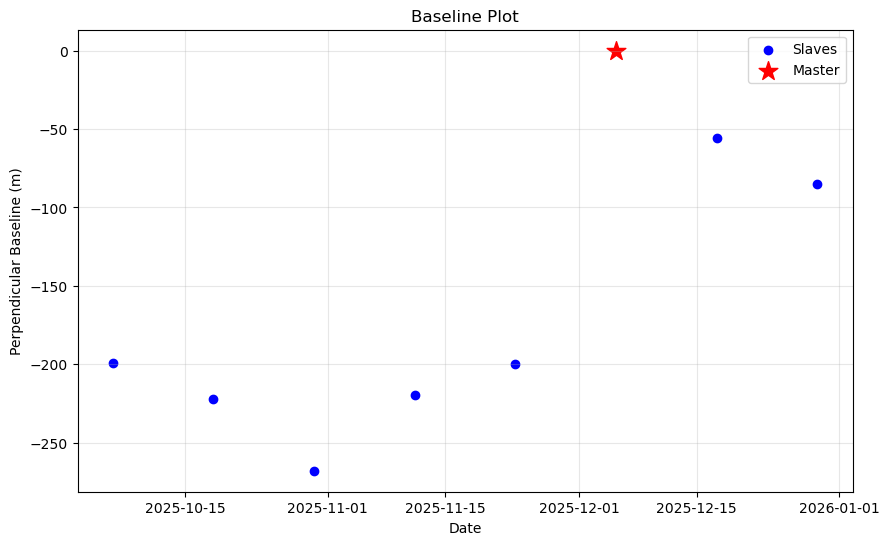

In [14]:
# If the static plot is enough, then set `interactive` to False.
dm.plot_baseline(interactive=False)

### 5 `add_selected`, `remove_selected`, `pruge_selected` & `view_selected` Methods

In [15]:
# ---------------------------------------------------------
# 5. Add to Download Queue (Shopping Cart)
# ---------------------------------------------------------
print("\n=== 4. Selecting Images to Download ===")
# An example: Select the secondary image (Index 1) to pair with the reference (Index 0)
# Note: The reference image is automatically included during download; only the secondary needs to be selected.
dm.add_selected(1)

# 장바구니 체크
print("Check cart|:")
try:
    display(dm.view_selected())
except NameError:
    print(dm.view_selected())


=== 4. Selecting Images to Download ===
[Select] Added Index 1
Check cart|:


,Type,Date,Scene ID,Orbit,Path,Frame,Flight Dir,Platform,Local Path,B_temp_days,B_perp_m
Index,,,,,,,,,,,
1,"Slave (+23d, -85.0m)",2025-12-29 09:16:59+00:00,S1A_IW_SLC__1SDV_20251229T091659_20251229T0917...,62528,156,134,ASCENDING,S1A,None,23,-85.0
5,MASTER,2025-12-05 09:17:01+00:00,S1A_IW_SLC__1SDV_20251205T091701_20251205T0917...,62178,156,134,ASCENDING,S1A,None,0,0.0


In [16]:
# also, you can put a list of int as the input
dm.add_selected([3,4])
# SLC of index 4 is incompatible b/c of its orbit diretion(Opposite, as its orbit as Decsending)
# Thus, only the valid pairs can be in the selection.
dm.view_selected()

[Select] Added Index 3
[Warning] Index 4 invalid.


,Type,Date,Scene ID,Orbit,Path,Frame,Flight Dir,Platform,Local Path,B_temp_days,B_perp_m
Index,,,,,,,,,,,
1,"Slave (+23d, -85.0m)",2025-12-29 09:16:59+00:00,S1A_IW_SLC__1SDV_20251229T091659_20251229T0917...,62528,156,134,ASCENDING,S1A,None,23,-85.0
3,"Slave (+11d, -56.0m)",2025-12-17 09:17:00+00:00,S1A_IW_SLC__1SDV_20251217T091700_20251217T0917...,62353,156,134,ASCENDING,S1A,None,11,-56.0
5,MASTER,2025-12-05 09:17:01+00:00,S1A_IW_SLC__1SDV_20251205T091701_20251205T0917...,62178,156,134,ASCENDING,S1A,None,0,0.0


In [17]:
# you can remove images by calling remove_selected
dm.remove_selected(1)
dm.view_selected()

[Select] Removed Index 1


,Type,Date,Scene ID,Orbit,Path,Frame,Flight Dir,Platform,Local Path,B_temp_days,B_perp_m
Index,,,,,,,,,,,
3,"Slave (+11d, -56.0m)",2025-12-17 09:17:00+00:00,S1A_IW_SLC__1SDV_20251217T091700_20251217T0917...,62353,156,134,ASCENDING,S1A,None,11,-56.0
5,MASTER,2025-12-05 09:17:01+00:00,S1A_IW_SLC__1SDV_20251205T091701_20251205T0917...,62178,156,134,ASCENDING,S1A,None,0,0.0


In [18]:
# you cannot remove the master
dm.remove_selected(5)
dm.view_selected()

[Select] Removed Index 5


,Type,Date,Scene ID,Orbit,Path,Frame,Flight Dir,Platform,Local Path,B_temp_days,B_perp_m
Index,,,,,,,,,,,
3,"Slave (+11d, -56.0m)",2025-12-17 09:17:00+00:00,S1A_IW_SLC__1SDV_20251217T091700_20251217T0917...,62353,156,134,ASCENDING,S1A,None,11,-56.0
5,MASTER,2025-12-05 09:17:01+00:00,S1A_IW_SLC__1SDV_20251205T091701_20251205T0917...,62178,156,134,ASCENDING,S1A,None,0,0.0


In [19]:
# if you want to remove the master, call unset_master method.
dm.unset_master()
dm.view_selected()

[Master] Unsetting Master (Index 5)...
[Reset] List restored. View type reverted to 'Selected'.


,Type,Date,Scene ID,Orbit,Path,Frame,Flight Dir,Platform,Local Path
Index,,,,,,,,,
3,Selected,2025-12-17 09:17:00+00:00,S1A_IW_SLC__1SDV_20251217T091700_20251217T0917...,62353,156,134,ASCENDING,S1A,None


In [20]:
# you can purge the whole list by calling purge_selected 🧹
dm.purge_selected()
dm.view_selected()

[Select] Selection cleared.


""


### 6) `download_selected` method and an usage example

In [21]:
ROI = "POLYGON((129.2 42.2, 129.3 42.2, 129.3 42.3, 129.2 42.3, 129.2 42.2))"
WORK_DIR = "raw_data"
df_results = dm.search_images("2025-10-01", "2026-01-10",orbit_direction=None)

# choose the master using the returned df
display(df_results.head())

[Search] API Search Sentinel-1 SLC (2025-10-01 ~ 2026-01-10) | ALL...
[Search] Found 17 scenes.


,Date,Scene ID,Orbit,Path,Frame,Flight Dir,Platform,Local Path
Index,,,,,,,,
0,2026-01-02 21:30:01+00:00,S1C_IW_SLC__1SDV_20260102T213001_20260102T2130...,5730,134,451,DESCENDING,S1C,None
1,2025-12-29 09:16:59+00:00,S1A_IW_SLC__1SDV_20251229T091659_20251229T0917...,62528,156,134,ASCENDING,S1A,None
2,2025-12-21 21:30:01+00:00,S1C_IW_SLC__1SDV_20251221T213001_20251221T2130...,5555,134,451,DESCENDING,S1C,None
3,2025-12-17 09:17:00+00:00,S1A_IW_SLC__1SDV_20251217T091700_20251217T0917...,62353,156,134,ASCENDING,S1A,None
4,2025-12-09 21:30:02+00:00,S1C_IW_SLC__1SDV_20251209T213002_20251209T2130...,5380,134,451,DESCENDING,S1C,None


In [22]:
# the latest SLC img under the search criteria
dm.set_master(0)
df_baseline=dm.get_stack_info()
df_baseline

[Master] Set to Idx 0. Filtered 8 incompatible scenes (Path 134).
[Baseline] Calculating B_perp for 9 scenes...


,Date,Scene ID,Orbit,Path,Frame,Flight Dir,Platform,Local Path,B_temp_days,B_perp_m
Index,,,,,,,,,,
0,2026-01-02 21:30:01+00:00,S1C_IW_SLC__1SDV_20260102T213001_20260102T2130...,5730,134,451,DESCENDING,S1C,None,0,0.0
2,2025-12-21 21:30:01+00:00,S1C_IW_SLC__1SDV_20251221T213001_20251221T2130...,5555,134,451,DESCENDING,S1C,None,-12,32.0
4,2025-12-09 21:30:02+00:00,S1C_IW_SLC__1SDV_20251209T213002_20251209T2130...,5380,134,451,DESCENDING,S1C,None,-24,-41.0
6,2025-11-27 21:30:03+00:00,S1C_IW_SLC__1SDV_20251127T213003_20251127T2130...,5205,134,451,DESCENDING,S1C,None,-36,-86.0
8,2025-11-15 21:30:03+00:00,S1C_IW_SLC__1SDV_20251115T213003_20251115T2130...,5030,134,451,DESCENDING,S1C,None,-48,-71.0
10,2025-11-03 21:30:04+00:00,S1C_IW_SLC__1SDV_20251103T213004_20251103T2130...,4855,134,451,DESCENDING,S1C,None,-60,-1.0
12,2025-10-22 21:30:04+00:00,S1C_IW_SLC__1SDV_20251022T213004_20251022T2130...,4680,134,451,DESCENDING,S1C,None,-72,-8.0
14,2025-10-10 21:30:04+00:00,S1C_IW_SLC__1SDV_20251010T213004_20251010T2130...,4505,134,451,DESCENDING,S1C,None,-84,-66.0
15,2025-10-10 21:30:04+00:00,S1C_IW_SLC__1SDV_20251010T213004_20251010T2130...,4505,134,451,DESCENDING,S1C,None,-84,-66.0


In [23]:
# by using simple pandas stuff, you can find the best Slave SLC
(
    df_baseline.
    assign(B_perp_m=df_baseline['B_perp_m'].abs()).
    query('B_temp_days <= 100 and B_perp_m <= 150').
    sort_values('B_perp_m', ascending=False)
)

,Date,Scene ID,Orbit,Path,Frame,Flight Dir,Platform,Local Path,B_temp_days,B_perp_m
Index,,,,,,,,,,
6,2025-11-27 21:30:03+00:00,S1C_IW_SLC__1SDV_20251127T213003_20251127T2130...,5205,134,451,DESCENDING,S1C,None,-36,86.0
8,2025-11-15 21:30:03+00:00,S1C_IW_SLC__1SDV_20251115T213003_20251115T2130...,5030,134,451,DESCENDING,S1C,None,-48,71.0
14,2025-10-10 21:30:04+00:00,S1C_IW_SLC__1SDV_20251010T213004_20251010T2130...,4505,134,451,DESCENDING,S1C,None,-84,66.0
15,2025-10-10 21:30:04+00:00,S1C_IW_SLC__1SDV_20251010T213004_20251010T2130...,4505,134,451,DESCENDING,S1C,None,-84,66.0
4,2025-12-09 21:30:02+00:00,S1C_IW_SLC__1SDV_20251209T213002_20251209T2130...,5380,134,451,DESCENDING,S1C,None,-24,41.0
2,2025-12-21 21:30:01+00:00,S1C_IW_SLC__1SDV_20251221T213001_20251221T2130...,5555,134,451,DESCENDING,S1C,None,-12,32.0
12,2025-10-22 21:30:04+00:00,S1C_IW_SLC__1SDV_20251022T213004_20251022T2130...,4680,134,451,DESCENDING,S1C,None,-72,8.0
10,2025-11-03 21:30:04+00:00,S1C_IW_SLC__1SDV_20251103T213004_20251103T2130...,4855,134,451,DESCENDING,S1C,None,-60,1.0
0,2026-01-02 21:30:01+00:00,S1C_IW_SLC__1SDV_20260102T213001_20260102T2130...,5730,134,451,DESCENDING,S1C,None,0,0.0


In [24]:
# or you can plot it
dm.plot_baseline(days=60, interactive=True)

In [25]:
# index of 2 looks nice for maximizing coherence by minimizing temporal and perpendicular baseline
display(dm.get_master())
dm.add_selected([0,2])
dm.view_selected()

,Master Info
Date,2026-01-02 21:30:01+00:00
Scene ID,S1C_IW_SLC__1SDV_20260102T213001_20260102T2130...
Orbit,5730
Path,134
Frame,451
Flight Dir,DESCENDING
Platform,S1C
Local Path,None


[Select] Added Index 0
[Select] Added Index 2


,Type,Date,Scene ID,Orbit,Path,Frame,Flight Dir,Platform,Local Path,B_temp_days,B_perp_m
Index,,,,,,,,,,,
0,MASTER,2026-01-02 21:30:01+00:00,S1C_IW_SLC__1SDV_20260102T213001_20260102T2130...,5730,134,451,DESCENDING,S1C,None,0,0.0
2,"Slave (-12d, 32.0m)",2025-12-21 21:30:01+00:00,S1C_IW_SLC__1SDV_20251221T213001_20251221T2130...,5555,134,451,DESCENDING,S1C,None,-12,32.0


In [26]:
# ---------------------------------------------------------
# 6. Download
# ---------------------------------------------------------
print("\n=== 5. Starting Download ===")
# 선택된 목록(2번) + 마스터(0번) = 총 2개 다운로드
downloaded_files = dm.download_selected(download_dir=WORK_DIR)

print(f"\n✅ download completed ({len(downloaded_files)} file(s)):")
for f in downloaded_files:
    print(f"   - {f}")


=== 5. Starting Download ===
[Auth] Initializing NASA Earthdata Authentication...
 [Auth] Logged in successfully.

[Download] Starting Sequential Download (2 files) to raw_data...
[1/2] Downloading: S1C_IW_SLC__1SDV_20260102T213001_20260102T213028_005730_00B73A_280A.zip


   Progress: 100%|#########################| 4.13G/4.13G [02:41<00:00, 27.5MB/s]


   Complete.

[2/2] Downloading: S1C_IW_SLC__1SDV_20251221T213001_20251221T213028_005555_00B135_DA0F.zip


   Progress: 100%|#########################| 4.13G/4.13G [02:42<00:00, 27.4MB/s]

   Complete.


✅ download completed (2 file(s)):
   - S1C_IW_SLC__1SDV_20260102T213001_20260102T213028_005730_00B73A_280A.zip
   - S1C_IW_SLC__1SDV_20251221T213001_20251221T213028_005555_00B135_DA0F.zip


In [27]:
# ==============================================================================
# [Step 1] 매니저 초기화 및 로컬 스캔
# ==============================================================================
# 로컬 모드이므로 ROI(WKT)를 넣을 필요가 없습니다.
s1_man = S1SLCManager() 

# 폴더를 스캔하여 파일 목록을 불러옵니다. (API 통신 X)
s1_man.scan_local_directory("./raw_data")

# 목록 확인
print("\n📋 [검색된 파일 목록]")
print(s1_man.search_df[['Date', 'Scene ID']])



[Scan] Found 2 SLC files in 'raw_data'
[Scan] Local database populated. (Note: Path/Orbit info is limited)

📋 [검색된 파일 목록]
            Date                                           Scene ID
Index                                                              
0     2025-12-21  S1C_IW_SLC__1SDV_20251221T213001_20251221T2130...
1     2026-01-02  S1C_IW_SLC__1SDV_20260102T213001_20260102T2130...


In [28]:

# ==============================================================================
# [Step 2] 마스터 및 슬레이브 선택
# ==============================================================================
# 예: 가운데 날짜인 2026-01-17 (Index 1)을 마스터로 설정
master_index = 1
s1_man.set_master(master_index)

# 나머지 파일들을 모두 슬레이브로 선택 (Index 0, 2)
# (물론 원하는 것만 골라서 add_selected([0]) 해도 됩니다)
all_indices = s1_man.search_df.index.tolist()
slaves = [i for i in all_indices if i != master_index]
s1_man.add_selected(slaves)

# 선택 현황 확인 (Baseline 정보가 로컬모드라 제한적일 수 있음)
print("\n👀 [선택된 구성 확인]")
print(s1_man.view_selected())


# ==============================================================================
# [Step 3] 자동 페어링 (핵심 기능!)
# ==============================================================================
# 다운로드(download_selected)는 파일이 있는지 확인하는 용도로 씁니다.
s1_man.download_selected("./raw_data")

# ISCEProcessor에 넣기 위한 (Master, Slave) 튜플 리스트 생성
pairs = s1_man.get_pairs()

print("\n✅ [생성된 처리 목록 (Pairs)]")
for p in pairs:
    print(f"   🔹 Master: {p[0]}")
    print(f"      Slave : {p[1]}")
    print("-" * 40)


# ==============================================================================
# [Step 4] (가상) 프로세서 연결
# ==============================================================================
# 실제로는 여기서 ISCEProcessor를 부르면 됩니다.
# processor.run_batch(pairs, ...)

print(f"\n🚀 이 'pairs' 리스트를 ISCEProcessor.run_batch()에 넣으면 바로 처리가 시작됩니다!")

[Master] Set to Idx 1. (Local Mode: Path filtering skipped)
[Select] Added Index 0

👀 [선택된 구성 확인]
               Type       Date  \
Index                            
0      Slave (-12d) 2025-12-21   
1            MASTER 2026-01-02   

                                                Scene ID  Orbit  Path  Frame  \
Index                                                                          
0      S1C_IW_SLC__1SDV_20251221T213001_20251221T2130...     -1    -1     -1   
1      S1C_IW_SLC__1SDV_20260102T213001_20260102T2130...     -1    -1     -1   

      Flight Dir Platform                                         Local Path  \
Index                                                                          
0        Unknown      S1C  raw_data/S1C_IW_SLC__1SDV_20251221T213001_2025...   
1        Unknown      S1C  raw_data/S1C_IW_SLC__1SDV_20260102T213001_2026...   

       B_temp_days  B_perp_m  
Index                         
0              -12       NaN  
1                0       NaN  

In [29]:
s1_man.get_master().iloc[1,0]

'S1C_IW_SLC__1SDV_20260102T213001_20260102T213028_005730_00B73A_280A.zip'

In [30]:
import os
import shutil
import pandas as pd
from pathlib import Path
from modules.SLC_manager import S1SLCManager

# ==============================================================================
# [Setup] 테스트 환경 및 가짜 데이터 생성
# ==============================================================================
TEST_DATA_DIR = "test_slc_data"
if os.path.exists(TEST_DATA_DIR):
    shutil.rmtree(TEST_DATA_DIR)
os.makedirs(TEST_DATA_DIR, exist_ok=True)

# S1A, S1B, 그리고 **S1C**가 섞인 가짜 파일 생성
mock_files = [
    "S1A_IW_SLC__1SDV_20220101T060000_20220101T060030_041260_04E820_1234.zip", # Index 0
    "S1B_IW_SLC__1SDV_20210502T060000_20210502T060030_026700_033100_5678.zip", # Index 1
    "S1C_IW_SLC__1SDV_20260201T150000_20260201T150030_002000_00BCDE_9999.zip"  # Index 2 (New!)
]

print(f"🔨 가짜 SLC 파일 {len(mock_files)}개 생성 중...")
for f in mock_files:
    Path(os.path.join(TEST_DATA_DIR, f)).touch()

# ==============================================================================
# [Test 1] S1C 인식 및 로컬 스캔 테스트
# ==============================================================================
print("\n🔵 [Test 1] Manager 초기화 및 S1C 스캔 테스트")
slc_man = S1SLCManager(data_dir=TEST_DATA_DIR)
df = slc_man.scan_local_directory()

# 결과 확인
print("\n📊 스캔 결과 (DataFrame):")
display(df[['Scene ID', 'Date', 'Platform']])

# 검증
s1c_exists = 'S1C' in df['Platform'].values
if s1c_exists:
    print("✅ S1C 위성이 정상적으로 인식되었습니다!")
else:
    print("❌ S1C 인식 실패.")

# ==============================================================================
# [Test 2] Master 설정 및 절대 경로 페어링 (Full Path)
# ==============================================================================
print("\n🔵 [Test 2] Master 설정 및 절대 경로 페어링 테스트")

# Index 0 (S1A)를 마스터로 설정
slc_man.set_master(0)

# Index 2 (S1C)를 Slave로 선택
slc_man.add_selected([1,2])

# 절대 경로 페어링 요청
pairs = slc_man.get_pairs(full_path=True)

print(f"🔗 생성된 페어 (Full Path):")
for m, s in pairs:
    print(f"   Master: {m}")
    print(f"   Slave : {s}")

# 검증: 경로가 절대 경로인지 확인 (리눅스 기준 '/' 로 시작)
if pairs[0][0].startswith("/") or ":\\" in pairs[0][0]: # Linux or Windows Absolute
    print("✅ 절대 경로가 반환되었습니다.")
else:
    print("❌ 상대 경로가 반환되었습니다 (수정 필요).")

# ==============================================================================
# [Test 3] Loose Coupling 인터페이스 (get_status)
# ==============================================================================
print("\n🔵 [Test 3] Loose Coupling 인터페이스 (get_status) 테스트")
status = slc_man.get_status()

print("📡 get_status() 반환값 (JSON):")
import json
print(json.dumps(status, indent=4, default=str))

# 검증
required_keys = ['module_name', 'is_ready', 'data_dir', 'pairs']
if all(k in status for k in required_keys):
    print("✅ 필요한 모든 상태 정보가 포함되어 있습니다.")
    print(f"   - Module: {status['module_name']}")
    print(f"   - Is Ready: {status['is_ready']}")
    print(f"   - Data Dir: {status['data_dir']}")
else:
    print("❌ 상태 정보 누락.")

🔨 가짜 SLC 파일 3개 생성 중...

🔵 [Test 1] Manager 초기화 및 S1C 스캔 테스트
[Scan] Found 3 SLC files in 'test_slc_data'
[Scan] Local database populated. (Note: Path/Orbit info is limited)

📊 스캔 결과 (DataFrame):


,Scene ID,Date,Platform
Index,,,
0,S1A_IW_SLC__1SDV_20220101T060000_20220101T0600...,2022-01-01,S1A
1,S1B_IW_SLC__1SDV_20210502T060000_20210502T0600...,2021-05-02,S1B
2,S1C_IW_SLC__1SDV_20260201T150000_20260201T1500...,2026-02-01,S1C


✅ S1C 위성이 정상적으로 인식되었습니다!

🔵 [Test 2] Master 설정 및 절대 경로 페어링 테스트
[Master] Set to Idx 0. (Local Mode: Path filtering skipped)
[Select] Added Index 1
[Select] Added Index 2
🔗 생성된 페어 (Full Path):
   Master: /raven/u/yhsuh/coding/INSAR/examples/test_slc_data/S1A_IW_SLC__1SDV_20220101T060000_20220101T060030_041260_04E820_1234.zip
   Slave : /raven/u/yhsuh/coding/INSAR/examples/test_slc_data/S1B_IW_SLC__1SDV_20210502T060000_20210502T060030_026700_033100_5678.zip
   Master: /raven/u/yhsuh/coding/INSAR/examples/test_slc_data/S1A_IW_SLC__1SDV_20220101T060000_20220101T060030_041260_04E820_1234.zip
   Slave : /raven/u/yhsuh/coding/INSAR/examples/test_slc_data/S1C_IW_SLC__1SDV_20260201T150000_20260201T150030_002000_00BCDE_9999.zip
✅ 절대 경로가 반환되었습니다.

🔵 [Test 3] Loose Coupling 인터페이스 (get_status) 테스트
📡 get_status() 반환값 (JSON):
{
    "module_name": "S1SLCManager",
    "is_ready": true,
    "data_dir": "/raven/u/yhsuh/coding/INSAR/examples/test_slc_data",
    "master_id": "S1A_IW_SLC__1SDV_20220101T06000